In [1]:
NAME = "William Nguyen"
COLLABORATORS = "TA Tran Nguyen Phuong Ha, TA Joram Erbarth"

---

# CS110 Assignment 3 - Trie trees

**Fell free to add more cells to the ones always provided in each question to expand your answers, as needed. Make sure to refer to the [CS110 course guide](https://drive.google.com/file/d/15qthc1zdBTcb7I0BhYjy0O0p186KwmG3/view?pli=1) on the grading guidelines, namely how many HC identifications and applications you are expected to include in each assignment.**

If you have any questions, do not hesitate to reach out to the TAs in the Slack channel "#cs110-algo", or come to one of your instructors' OHs.

### Submission Materials
Your assignment submission needs to include the following resources:
1. A PDF file must be the first resource and it will be created from the Jupyter notebook template provided in these instructions. Please make sure to use the same function names as the ones provided in the template. If your name is “Dumbledore”, your PDF should be named “Dumbledore.pdf”.
2. Your second resource must be a single Python/Jupyter Notebook named “Dumbledore.ipynb”. You can also submit a zip file that includes your Jupyter notebook, but please make sure to name it “Dumbledore.zip” (if your name is Dumbledore!).

For details on how to create a nice PDF from a Jupyter notebook, refer again to the [CS110 course guide](https://drive.google.com/file/d/15qthc1zdBTcb7I0BhYjy0O0p186KwmG3/view?pli=1).

### HCs and LOs for this assignment
[#responsibility], [#PythonProgramming], [#CodeReadability], [#DataStructures], [#ComplexityAnalysis], [#ComputationalCritique]

## Question 0

Take a screenshot of your CS110 dashboard on Forum where the following is visible:
* your name.
* your absences for the course have been set to excused up to the end of week 10 (inclusively).

This will be evidence that you have submitted acceptable pre-class and make-up work
for a CS110 session you may have missed. Check the specific CS110 make-up and
pre-class policies in the syllabus of the course.

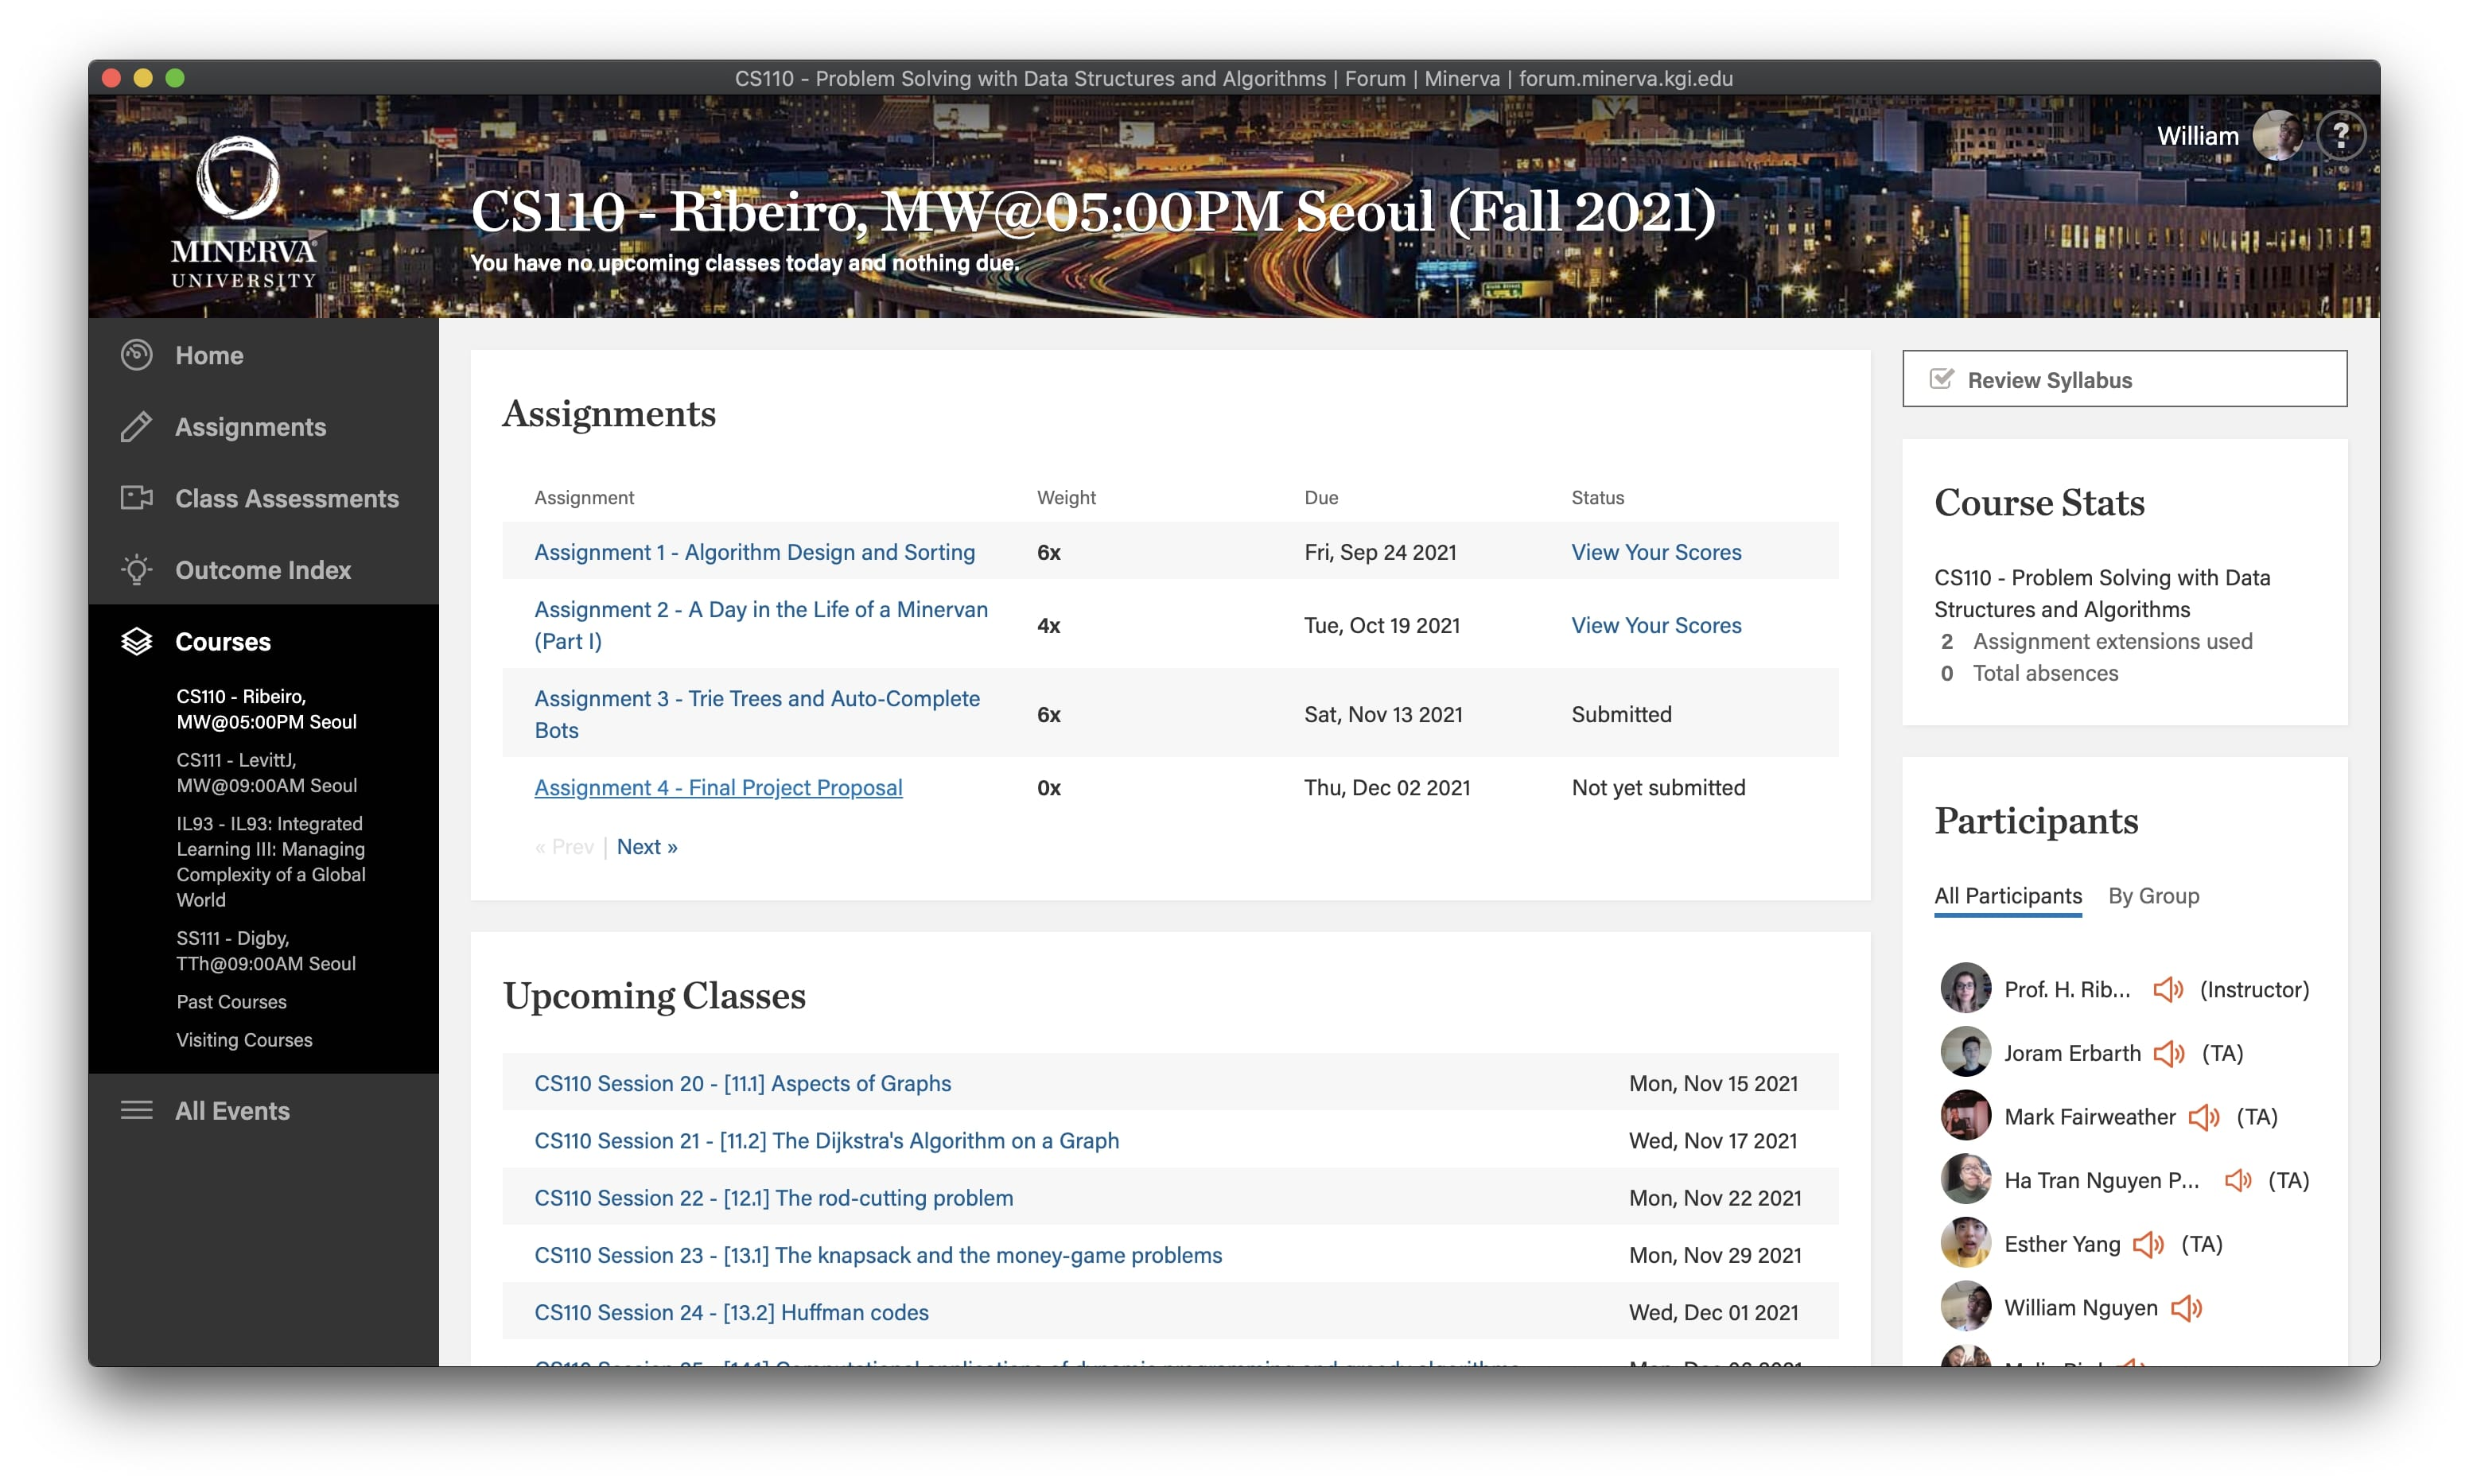

In [2]:
# YOUR Q0 ANSWER HERE

from IPython.display import Image, display

display(Image("Screen Shot 2021-11-11 at 22.26.48.jpg"))

## Overview

Auto-completion functionalities are now ubiquitous in search engines, document editors, and messaging apps. How would you go about developing an algorithmic strategy from scratch to implement these computational solutions? In this assignment, you will learn about a new data structure and use it to build a very simple auto-complete engine. Each question in the assignment guides you closer to that objective while encouraging you to contrast this novel data structure to the other ones we have discussed in class.

A [trie tree](https://en.wikipedia.org/wiki/Trie), or a prefix tree, is a common data structure that stores a set of strings in a collection of nodes so that all strings with a common prefix are found in the same branch of the tree. Each node is associated with a letter, and as you traverse down the tree, you pick up more letters, eventually forming a word. Complete words are commonly found on the leaf nodes. However, some inner nodes can also mark full words.

Let’s use an example diagram to illustrate several important features of tries:

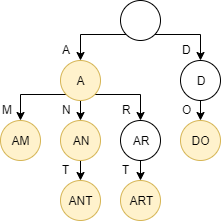

- Nodes that mark valid words are marked in yellow. Notice that while all leaves are considered valid words, only some inner nodes contain valid words, while some remain only prefixes to valid words appearing down the branch.

- The tree does not have to be balanced, and the height of different branches depends on its contents.

- In our implementation, branches never merge to show common suffixes (for example, both ANT and ART end in T, but these nodes are kept separate in their respective branches). However, this is a common first line of memory optimization for tries.

- The first node contains an empty string; it “holds the tree together.”

Your task in this assignment will be to implement a functional trie tree. You will be able to insert words into a dictionary, lookup valid and invalid words, print your dictionary in alphabetical order, and suggest appropriate suffixes like an auto-complete bot.

The assignment questions will guide you through these tasks one by one. To stay safe from breaking your own code, and to reinforce the idea of code versioning, under each new question first **copy your previous (working) code**, and only then **implement the new feature**. The code skeletons provided throughout will make this easier for you at the cost of repeating some large portions of code.

## Q1: Implement a trie tree

In this question, you will write Python code that can take a set/list/tuple of strings and insert them into a trie tree and lookup whether a specific word/string is present in the trie tree.

### Q1a: Theoretical pondering

Two main approaches to building trees, you might recall from class, are making separate Tree and Node classes, or only making a Node class. Which method do you think is a better fit for trie trees, and why? **Justify your reasoning in around 100 words.** You will use your chosen approach throughout the assignment, so don't rush this question.

Two separate classes can work better for trie trees because there is a distinction between functionalities for nodes and trees. If there is only a node class, staying aware of the word_list we input into the tree might be inconvenient. Furthermore, having two different classes allows readers to understand the code more easily because it makes more intuitive sense to use methods and attributes in trees or nodes up to circumstances. For example, in building the tree, we get an instance from the tree class, insert words into nodes by calling node class. Then, when we write operations in the tree, we can separate what to do with a node and a tree in general, which keeps the coder easier to follow along. 

Word count: 119

### Q1b: Practical implementation

In the two cells below, there are two code skeletons. Depending on your answer to Q1a, either **implement a Node and a Trie class** or **implement a Node class**. Choose the corresponding code cell and delete the other one.

For your class(es), write **insert()** and **lookup()** methods, which will insert a word into the trie tree and look it up, respectively. Use the code skeleton and examine the specifications of its docstrings to guide you on the details of inputs and outputs to each method.

If you are coding two classes, your Trie should, upon initiation, create the root Node. If you are coding a single class, use an attribute to mark the root node.

Finally, make sure that the trie can be **initiated with a wordbank as an input**. This means that a user can create a trie and feed it an initial dictionary of words at the same time (like in the tests below), which will be automatically inserted into the trie upon its creation. Likely, this will mean that your \_\_init\_\_() has to make some calls to your insert() method.

Several test cases have been provided for your convenience and these include some, but not all, possible edge cases. If the implementation is correct, your code will pass all the tests. In addition, create at least **three more tests** to demonstrate that your code is working correctly and justify why such test cases are appropriate.

In [3]:
# VERSION 1 - Node + Trie classes

class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):
        
        # children of each node are stored in a dictionary 
        # where key is the char, value is a child node

        self.children = {}
        # initialize all nodes not to be leaves
        self.IsaWord = False
        self.char = char
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        # YOUR CODE HERE
        # get an empty root node
        self.root = Node(None)
        
        # as long as there is word in the word_list
        if word_list:
            # turn all into lowercase
            self.lowercase(word_list)
            # insert each word in the tree
            for i in range(len(word_list)):
                self.insert(word_list[i])
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        # YOUR CODE HERE
        # initialize the pointer to be the root to start going down
        pointer = self.root
        
        # loop over the whole word
        for char in word:
            # if the next character of the word is in the children keys
            if char in pointer.children:
                # the pointer points to the next child node
                pointer = pointer.children[char]
                
            # otherwise, get a new child node as value with key being the character
            else:
                new_node = Node(char)
                pointer.children[char] = new_node
                pointer = new_node

        # after inserting all characters of a word into the tree
        # the end child is marked the leaf - a complete word
        pointer.IsaWord = True
    
    
    def lowercase(self, word_list):
        """ Turns all words in the word list into lowercase.
        
        Parameters
        ----------
        word_list : list 
            The list holding all words
            
        Returns
        -------
        list
            The list holding all lowercase words
        """
        for i in range(len(word_list)):
            word_list[i] = word_list[i].lower()

        return word_list
    
    
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        # YOUR CODE HERE
        # turn the input into lowercase because the word_list only stores lowercase words
        word = word.lower()

        # initialize the pointer to be the root
        pointer = self.root
        # go through the word
        for char in word:
            # if the child node does not have the next character of the word 
            if char not in pointer.children:
                # means, the word is not in the tree
                return False
            # but if the next character exists in the child node, move pointer to the next child
            pointer = pointer.children[char]
        # if all characters are in child nodes, return the attribute defining a leaf
        # if the end character is indeed a leaf, it is a complete word. otherwise, it is incomplete
        return pointer.IsaWord

# Here are several tests that have been created for you.
# Remeber that the question asks you to provide several more,
# as well as to justify them.

# This is Namárië, JRRT's elvish poem written in Quenya
wordbank = "Ai! laurië lantar lassi súrinen, yéni unótimë ve rámar aldaron! Yéni ve lintë yuldar avánier mi oromardi lisse-miruvóreva Andúnë pella, Vardo tellumar nu luini yassen tintilar i eleni ómaryo airetári-lírinen. Sí man i yulma nin enquantuva? An sí Tintallë Varda Oiolossëo ve fanyar máryat Elentári ortanë, ar ilyë tier undulávë lumbulë; ar sindanóriello caita mornië i falmalinnar imbë met, ar hísië untúpa Calaciryo míri oialë. Sí vanwa ná, Rómello vanwa, Valimar! Namárië! Nai hiruvalyë Valimar. Nai elyë hiruva. Namárië!".replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()

trie = Trie(wordbank)
# be careful about capital letters!
assert trie.lookup('oiolossëo') == True
# this is a prefix, but also a word in itself
assert trie.lookup('an') == True
# this is a prefix, but NOT a word
assert trie.lookup('ele') == False
# not in the wordbank
assert trie.lookup('Mithrandir') == False

# Note: There are several ways in which we can condense the text cleaning syntax, 
# without repeating the method replace() multiple times, 
# but we are leaving it this way for clarity.

In [4]:
# VERSION 2 - Node class

#class Node:
#    """This class represents one node of a trie tree.
    
#    Remember, the root Node needs to allow access to the entire trie.
#    Consider conditioning some methods to be only callable on the root.
    
#    Parameters
#    ----------
#   The parameters for the Node class are not predetermined.
#    However, you will likely need to create one or more of them.
    
#    Methods
#    -------
#    insert(self, word)
#        Inserts a word into the trie, creating nodes as required.
#    lookup(self, word)
#        Determines whether a given word is present in the trie.
#    """
    
#    def __init__(self, word_list = None):
#        """Creates the Node instance, inserts initial words if provided.
        
#        Parameters
#        ----------
#        word_list : list
#            List of strings to be inserted into the trie upon creation.
#        """
#        # YOUR CODE HERE
        
    
#    def insert(self, word):
#        """Inserts a word into the trie, creating missing nodes on the go.
        
#        Parameters
#        ----------
#        word : str
#            The word to be inserted into the trie.
#        """
        # YOUR CODE HERE
        
        
#   def lookup(self, word):
#       """Determines whether a given word is present in the trie.
        
#        Parameters
#        ----------
#        word : str
#            The word to be looked-up in the trie.
            
#        Returns
#        -------
#        bool
#            True if the word is present in trie; False otherwise.
            
#        Notes
#        -----
#        Your trie should ignore whether a word is capitalized.
#        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
#        """
        # YOUR CODE HERE
        

# Here are several tests that have been created for you.
# Remeber that the question asks you to provide several more,
# as well as to justify them.

# This is Namárië, JRRT's elvish poem written in Quenya
#wordbank = "Ai! laurië lantar lassi súrinen, yéni unótimë ve rámar aldaron! Yéni ve lintë yuldar avánier mi oromardi lisse-miruvóreva Andúnë pella, Vardo tellumar nu luini yassen tintilar i eleni ómaryo airetári-lírinen. Sí man i yulma nin enquantuva? An sí Tintallë Varda Oiolossëo ve fanyar máryat Elentári ortanë, ar ilyë tier undulávë lumbulë; ar sindanóriello caita mornië i falmalinnar imbë met, ar hísië untúpa Calaciryo míri oialë. Sí vanwa ná, Rómello vanwa, Valimar! Namárië! Nai hiruvalyë Valimar. Nai elyë hiruva. Namárië!".replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()

#trie = Node(wordbank)
# be careful about capital letters!
# assert trie.lookup('oiolossëo') == True
# this is a prefix, but also a word in itself
# assert trie.lookup('an') == True
# this is a prefix, but NOT a word
# assert trie.lookup('ele') == False
# not in the wordbank
# assert trie.lookup('Mithrandir') == False

# Note: There are several ways in which we can condense the text cleaning syntax, 
# without repeating the method replace() multiple times, 
# but we are leaving it this way for clarity.

In [5]:
# YOUR NEW TESTS HERE

#TEST CASES:

#test 1

wordbank = "Tên của tôi là Nguyễn Tài Tâm. Tôi đang là sinh viên năm hai tại trường đại học Minerva, tại bang California ở nước Mỹ".replace(".", "").replace(",", "").split()
trie = Trie(wordbank)
assert trie.lookup('Nguyễn') == True
assert trie.lookup('Nguyen') == False
assert trie.lookup('') == False
assert trie.lookup('Nguyễn Tài Tâm') == False

#test 2

wordbank = ''
trie = Trie(wordbank)
assert trie.lookup('') == False
assert trie.lookup('Professor') == False

#test 3

wordbank = '내 이름은 Nguyen Tai Tam 입니다. 저는 미국 캘리포니아 주에 있는 미네르바 대학교 2학년입니다.'.replace(".", "").replace(",", "").split()
trie = Trie(wordbank)
assert trie.lookup('있는') == True
assert trie.lookup('Tam') == True
assert trie.lookup('안녕하십니까') == False



These three test cases are appropriate because they touch different cases that have not been reflected in given test cases. First, I include my mother tongue - Vietnamese - which includes tone marks which adds more characters a word can have. Korean is also my choice to produce a test case because I want to see if different symbols than ordinary abc letters can work in a trie tree.  Trie tree is supposed to handle different languages because it just keeps adding child nodes holding certain characters which should be maintained. Furthermore, I also check the case where an empty string is inputted. Also, I also test if the word_list inputted to the trie tree is empty. If there are no words given to the trie tree, no matter what we are trying to search, it should print out False because there is nothing in the trie tree.


## Q2: The computational complexity of tries

Evaluate the **computational complexity of the insert() and lookup()** methods in a trie. What are the relevant variables for runtime? You might want to consider how the height of a trie is computed to start addressing this question.  Make sure to clearly explain your reasoning.

**Compare your results to** the runtime of the same operations on **a BST**. Can you think of specific circumstances where the practical runtimes of operations supported by tries are higher than for BSTs? Explain your answer. If you believe such circumstances could be common, why would someone even bother implementing a trie tree?

In a trie, the lookup() method will verify if the next character in the word is in the children dictionary of the preceding character. The results are given when we found all characters of the word with a parent-children relationship or we could not see the next character as a child of the current prefix. Meanwhile, the insert() method quite follows the same procedure, except that if the next character is not found, it will be added to the children so that a word can be present in the tree. For this reason, the time complexity of any words to be inserted or searched will be theta of l and O(l), respectively, with l as the greatest length of a specific word inputted. I chose Big theta for insert() because no matter what the word is or how much part of it is already in the tree, we still have to verify all the word characters to ensure its presence in the tree. Therefore, in both worst or best cases, they take linear time to complete the examination of the whole word. Instead, I choose Big-O for lookup() because the best case can be in constant time when the first character of the word is not in the tree and we can conclude immediately that the word is not there. 

The main difference between BSTs and tries in storing strings is that while BSTs store an entire word in a node, tries dedicate one node to only a character. Therefore, tries take advantage of the fact that several words share the same prefix and they only consume extra memories for when words start to differ. Instead, for long words, BSTs sometimes find words easily because just making some comparisons and get to the word as a whole 

To recall, both insert() and search() methods in BST will take O(log n) in the average case scenario. This is when the tree is not too unbalanced, thus making the scaling behavior lie in logarithmic sense. However, in the worst case where all nodes lie on one side of their parents and our key is at the end, the time complexity is O(n) as we have to go through all nodes. 
Generally speaking, trie trees will become wider yet shorter than BSTs because trie tree’s height only depends on the longest words and one node already links to multiple children representing different characters. In this way, the height of trie trees should not make us worry as much as about the height of BSTs.
To construct the relationship of time complexity of search() and insert() methods in both trees, we can say that as long as the length of the word is less than the logarithmic order of the input size, trie trees will consistently outperform BSTs. Analytically, we can claim that for trie trees to search and insert a specific word faster than BSTs, l should be less than log n, ignoring other constant factors. We can assume that the logarithmic order is base two because this is convention. 

Therefore, we can say that

$$ l < log2 (n) $$

or 

$$ 2^l < n $$

We should be aware that in some cases, trie trees can be less efficient. This is when input sizes are not large, and words share a lot of common prefixes. In this case, while BSTs can easily search for the word with each node holding the whole word, trie trees can take a lot of time because it has to go down the entire common prefix and can only search for the targeted word when characters start to differ. To make matters worse, if we have to insert a super long word into a tree already holding long words with the same prefixes as the newly inserted word. In these similar situations, operations supported by tries take longer to complete than by BSTs. 
However, these nightmarish cases rarely occur, and the value of trie in search engines or language learning purposes is much more appreciated. To elaborate, thanks to prefix-sharing principles in trie trees, we can produce an autocomplete() method better than in BSTs. In practice, informal texting or information searching rarely necessitates hundred-character words, which favors trie trees. Furthermore, trie trees can also be applied in games to learn languages by linking letters to form a complete word. Overall, the value of tries’ application, especially in strings, is terrific. 


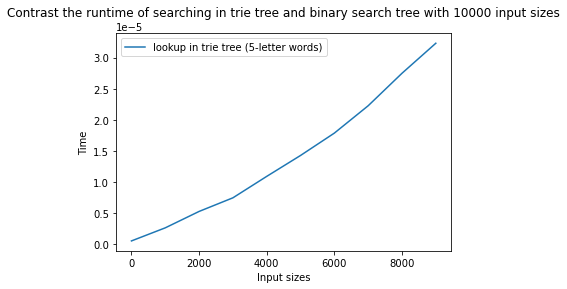

In [6]:
import random
import string
import time
class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):
        
        # children of each node are stored in a dictionary 
        # where key is the char, value is a child node

        self.children = {}
        # initialize all nodes not to be leaves
        self.IsaWord = False
        self.char = char
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        # YOUR CODE HERE
        # get an empty root node
        self.root = Node(None)
        
        # as long as there is word in the word_list
        if word_list:
            
            # insert each word in the tree
            for i in range(len(word_list)):
                self.insert(word_list[i])
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        # YOUR CODE HERE
        # initialize the pointer to be the root to start going down
        pointer = self.root
        
        # loop over the whole word
        for char in word:
            # if the next character of the word is in the children keys
            if char in pointer.children:
                # the pointer points to the next child node
                pointer = pointer.children[char]
                
            # otherwise, get a new child node as value with key being the character
            else:
                new_node = Node(char)
                pointer.children[char] = new_node
                pointer = new_node

        # after inserting all characters of a word into the tree
        # the end child is marked the leaf - a complete word
        pointer.IsaWord = True
    
    
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        # YOUR CODE HERE

        # initialize the pointer to be the root
        pointer = self.root
        # go through the word
        for char in word:
            # if the child node does not have the next character of the word 
            if char not in pointer.children:
                # means, the word is not in the tree
                return False
            # but if the next character exists in the child node, move pointer to the next child
            pointer = pointer.children[char]
        # if all characters are in child nodes, return the attribute defining a leaf
        # if the end character is indeed a leaf, it is a complete word. otherwise, it is incomplete
        return pointer.IsaWord


#####
letters = string.ascii_lowercase

trie_tree = []
each_trial_trie = []

word_list = []

input_size = [j for j in range(1, 10001, 1000)] # 1, 51, 101, 151


for j in input_size: # with different input sizes
    for i in range(50):
   # create a word list whose length is the input size. word length is 100
        word_list.append( ''.join(random.choice(letters) for i in range(5)) for _ in range(j))

        target = str(random.choice(word_list))

        trie = Trie(word_list)

        a = time.time()
        trie.lookup(target)
        b = time.time()

        each_trial_trie.append(b-a)

    trie_tree.append(sum(each_trial_trie) / 50)



    




import matplotlib.pyplot as plt
%matplotlib inline
y1 = trie_tree

x = input_size
plt.plot(x, y1, label = "lookup in trie tree (5-letter words)")

plt.xlabel("Input sizes")
plt.ylabel("Time")
plt.title('Contrast the runtime of searching in trie tree and binary search tree with 10000 input sizes', y = 1.05)
plt.legend()
plt.show()

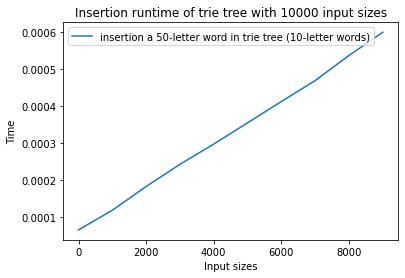

In [7]:
import time
import random
import string

class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):
        
        # children of each node are stored in a dictionary 
        # where key is the char, value is a child node

        self.children = {}
        # initialize all nodes not to be leaves
        self.IsaWord = False
        self.char = char
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        # YOUR CODE HERE
        # get an empty root node
        self.root = Node(None)
        
        # as long as there is word in the word_list
        if word_list:
            
            # insert each word in the tree
            for i in range(len(word_list)):
                self.insert(word_list[i])
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        # YOUR CODE HERE
        # initialize the pointer to be the root to start going down
        pointer = self.root
        
        # loop over the whole word
        for char in word:
            # if the next character of the word is in the children keys
            if char in pointer.children:
                # the pointer points to the next child node
                pointer = pointer.children[char]
                
            # otherwise, get a new child node as value with key being the character
            else:
                new_node = Node(char)
                pointer.children[char] = new_node
                pointer = new_node

        # after inserting all characters of a word into the tree
        # the end child is marked the leaf - a complete word
        pointer.IsaWord = True
    
    
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        # YOUR CODE HERE

        # initialize the pointer to be the root
        pointer = self.root
        # go through the word
        for char in word:
            # if the child node does not have the next character of the word 
            if char not in pointer.children:
                # means, the word is not in the tree
                return False
            # but if the next character exists in the child node, move pointer to the next child
            pointer = pointer.children[char]
        # if all characters are in child nodes, return the attribute defining a leaf
        # if the end character is indeed a leaf, it is a complete word. otherwise, it is incomplete
        return pointer.IsaWord



letters = string.ascii_lowercase

trie_tree = []
each_trial_trie = []

word_list = []

input_size = [j for j in range(1, 10001, 1000)] # 1, 51, 101, 151


for j in input_size: # with different input sizes
    for i in range(50):
   # create a word list whose length is the input size. word length is 100
        word_list.append( ''.join(random.choice(letters) for i in range(10)) for _ in range(j))

        
        trie = Trie(word_list)

        a = time.time()
        trie.insert(random.choice(letters) for i in range(50))
        b = time.time()

        each_trial_trie.append(b-a)

    trie_tree.append(sum(each_trial_trie) / 50)



    




import matplotlib.pyplot as plt
%matplotlib inline
y1 = trie_tree

x = input_size
plt.plot(x, y1, label = "insertion a 50-letter word in trie tree (10-letter words)")

plt.xlabel("Input sizes")
plt.ylabel("Time")
plt.title('Insertion runtime of trie tree with 10000 input sizes')
plt.legend()
plt.show()

The graphs showing runtime of insert() and lookup() do support my analysis that the time complexity of two operations will be O(l) with l being the length of the longest word. Therefore, as the input size increases, the runtime will not increase significantly. As can be seen from the graph, from input size 0 to nearly 10,000, the runtime only goes from 0.0001 to 0.0006 seconds. Even though the line shows a linear growth, to dig deeper, it is more of a constant time because it does not depend on the input size and the growth in runtime is marginal. 

In [8]:
import time
import random
import string

class BSTNode:
    """ 
    A Node class for the Binary Search Tree class

    Attributes
    ----------
    l_child: Node/ None
        The left child of the node.
        If exists, the left child's data is smaller than the node's.
    r_child: Node/ None
        The right child of the node.
        If exists, the right child's data is larger than or equal to the node's.
    parent: Node/ None
        The parent of the node
    data: int
        The data of the node.
    """  
    def __init__(self, data):
        """
        Parameters
        ----------
        data: int
            The data of the node.
        """ 
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = data


class BinarySearchTree:

    def __init__(self, word_list = None):
        self.root = None

        # insert all words in the word_list to the tree for initialization
        if word_list:
            for i in range(len(word_list)):
                self.insert(word_list[i])


    def insert(self, node):
        """
        Insert a node/ value of the node into the tree

        Parameters
        ----------
        node: Node/ int
            the node or the value of the node

        Returns
        ----------
        None
        """

        if type(node) is str: 
            node = BSTNode(node)

        if self.root is None:
            self.root = node
            return
        else:
            self._insert_node(node, self.root)

    def _insert_node(self, node, root):
        """
        Insert a node into an existing subtree

        Parameters
        ----------
        root: Node
            the root of the subtree
        node: Node
            the node to be inserted

        Returns
        ----------
        None
        """
        if root.data > node.data:
            if root.l_child is None:
                root.l_child = node
                node.parent = root
            else:
                self._insert_node(node, root.l_child)
        else:
            if root.r_child is None:
                root.r_child = node
                node.parent = root
            else:
                self._insert_node(node, root.r_child)


    def search(self, word):
        """
        Search for a word in the Binary Search Tree

        Parameters
        ----------
        word: str
            the word that needs to be searched

        Returns
        ----------
        Node/ None
            the first node found, or None
        """
        if self.root is None:
            return False
        else:
            return self._search_word(word, self.root)

    def _search_word(self, word, root):
        """
        Search for a word from the root of the subtree

        Parameters
        ----------
        word: str
            the word that needs to be searched
        root: Node/ None
            the root of the subtree to search the value

        Returns
        ----------
        Node/ None
            the first node found, or None
        """
        #Your code here
        if word == self.root.data:
            return True
        elif word < self.root.data:
            self.root = self.root.l_child
            return self.search(word)
        else:
            self.root = self.root.r_child
            return self.search(word)


class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):
        
        # children of each node are stored in a dictionary 
        # where key is the char, value is a child node

        self.children = {}
        # initialize all nodes not to be leaves
        self.IsaWord = False
        self.char = char
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        # YOUR CODE HERE
        # get an empty root node
        self.root = Node(None)
        
        # as long as there is word in the word_list
        if word_list:
            
            # insert each word in the tree
            for i in range(len(word_list)):
                self.insert(word_list[i])
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        # YOUR CODE HERE
        # initialize the pointer to be the root to start going down
        pointer = self.root
        
        # loop over the whole word
        for char in word:
            # if the next character of the word is in the children keys
            if char in pointer.children:
                # the pointer points to the next child node
                pointer = pointer.children[char]
                
            # otherwise, get a new child node as value with key being the character
            else:
                new_node = Node(char)
                pointer.children[char] = new_node
                pointer = new_node

        # after inserting all characters of a word into the tree
        # the end child is marked the leaf - a complete word
        pointer.IsaWord = True
    
    
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        # YOUR CODE HERE

        # initialize the pointer to be the root
        pointer = self.root
        # go through the word
        for char in word:
            # if the child node does not have the next character of the word 
            if char not in pointer.children:
                # means, the word is not in the tree
                return False
            # but if the next character exists in the child node, move pointer to the next child
            pointer = pointer.children[char]
        # if all characters are in child nodes, return the attribute defining a leaf
        # if the end character is indeed a leaf, it is a complete word. otherwise, it is incomplete
        return pointer.IsaWord


# assume all letters in this experiment are in lowercase
letters = string.ascii_lowercase

trie_tree = []
each_trial_trie = []


bst_tree = []
each_trial_bst = []

word_list = []

input_size = [j for j in range(1, 10001, 500)] # 1, 51, 101, 151


for j in input_size: # with different input sizes
    # calculate 50 experiments 
    for i in range(50):
    # create a word list whose length is the input size. word length is 50
        word_list.append( ''.join(random.choice(letters) for i in range(50)) for _ in range(j))

        # pick a random word to search in two trees
        target = str(random.choice(word_list))

        trie = Trie(word_list)

        a = time.time()
        trie.lookup(target)
        b = time.time()
        
        # add the time of one experiment to a list
        each_trial_trie.append(b-a)

        bst = BinarySearchTree(word_list)

        c = time.time()
        bst.search(target)
        d = time.time()

        # add the time of one experiment to a list
        each_trial_bst.append(d-c)
        
    # get the average time of experiments with corresponding input sizes
    trie_tree.append(sum(each_trial_trie) / 50)
    bst_tree.append(sum(each_trial_bst) / 50)


    




import matplotlib.pyplot as plt
%matplotlib inline
y1 = trie_tree
y2 = bst_tree
x = input_size
plt.plot(x, y1, label = "lookup in trie tree (100-letter words)")
plt.plot(x, y2, label = 'lookup in binary search tree')
plt.xlabel("Input sizes")
plt.ylabel("Time")
plt.title('Contrast the runtime of searching in trie tree and binary search tree with 10000 input sizes')
plt.legend()
plt.show()



AttributeError: 'generator' object has no attribute 'data'

I tried to write a version of binary search tree storing strings, not numbers and write code to conduct experiments for comparison between trie tree and binary search tree with operations like search and insertion. However, the error I get is 'generator' object has no attribute 'data' I understood that I randomly generated wordbank and randomly generated a word for searching. Also, in binary search tree, each node carries the word as its attribute of 'data', but generator does not support features of OOP. Without random generation of words and increasing input sizes, the validity of experiments can be affected. Therefore, I would mainly base my comparison between trie and binarys search trees on analytical reasoning. 

## Q3: Print a dictionary in alphabetical order.

Recall the meaning of pre-order traversal from your previous classes. On the data structure of a trie tree, pre-order traversal corresponds to an alphabetically sorted list of the words contained within (provided that your node children are sorted alphabetically).

For example, on the example trie given in the introduction, pre-order traversal would return ["A", "AM, "AN", "ANT", "AR, "ART, "D" and "DO"]. However, since we are only interested in the actual words, we would not include "D" and "AR" in our list. To that end, you will need to include an attribute for each node, storing the information about whether its content is a word or not.

Copy your existing code to the code skeleton cell below, and add a new method to it, **alphabetical_list()**. This will be version two of your autocomplete script.

The method should **return a list**, whose elements will be the words contained in the tree, in alphabetical order. On top of passing the provided test, write at least **three more tests**, and explain why they are appropriate.

**Approach choice:** Remember the two possible approaches to the problem, as we’ve seen at the start of the course: iterative or recursive. Depending on your trie implementation, one might be preferred over the other. **Justify your choice of approach** in a few sentences (~100 words).

Copy-paste your previous code and make adjustments to this "new version", so that you cannot break the old one :).

*(Notes: If you choose a recursive approach, it might be useful to implement a helper method that is not called by the user but by preorder_traversal(). Also, watch out for the [unintuitive Python behaviour](https://web.archive.org/web/20200221224620/http://effbot.org/zone/default-values.htm) if defining functions with mutable default parameter values.)*

When it comes to time complexity, there is no considerable difference between iteration and recursion. To traverse through the tree and print out the alphabetical list, we still have to reach all nodes and reach O(n) time complexity. However, the recursive approach consumes more memory because each recursive call is heavier to store the value at that call. This can be dangerous if the input size amounts to hundreds of thousands of data points, throwing the error of maximum recursion depth. However, I still choose recursion because of not currently facing any space constraints. Besides, writing recursive code is more elegant and easier to follow along with the strategy. 

Word count: 110 words

In [9]:
# depending on your choice of approach,
# add the method either to the Node or the Trie class.
class Node:
    
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):

        # children of each node are stored in a dictionary 
        # where key is the char, value is a child node

        self.children = {}
        # initialize all nodes not to be leaves
        self.IsaWord = False
        self.char = char
        # add a new attribute to show the currently formed word when reaching a character
        self.wordd = None
        
        
class Trie:
    
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):
        
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        # get an empty root node
        self.root = Node(None)
        
        # as long as there is word in the word_list
        if word_list:
            # turn all into lowercase
            self.lowercase(word_list)
            # insert each word in the tree
            for i in range(len(word_list)):
                self.insert(word_list[i])
        

    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        
        # initialize the pointer to be the root to start going down
        pointer = self.root
        
        # loop over the whole word
        for char in word:
            # if the next character of the word is in the children keys
            if char in pointer.children:
                # the pointer points to the next child node
                pointer = pointer.children[char]
                
            # otherwise, get a new child node as value with key being the character
            else:
                new_node = Node(char)
                pointer.children[char] = new_node
                pointer = new_node

        # after inserting all characters of a word into the tree
        # the end child marks a complete word
        pointer.IsaWord = True
        
        # get the complete word at the end character
        pointer.wordd = word
        
    
    def lowercase(self, word_list):
        """ Turns all words in the word list into lowercase.
        
        Parameters
        ----------
        word_list : list 
            The list holding all words
            
        Returns
        -------
        list
            The list holding all lowercase words
        """
        for i in range(len(word_list)):
            word_list[i] = word_list[i].lower()

        return word_list


    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        
        # turn the input into lowercase because the word_list only stores lowercase words
        word = word.lower()

        # initialize the pointer to be the root
        pointer = self.root
        # go through the word
        for char in word:
            # if the child node does not have the next character of the word 
            if char not in pointer.children:
                # means the word is not in the tree
                return False
            # but if the next character exists in the child node, move pointer to the next child
            pointer = pointer.children[char]
        # if all characters are in child nodes, return the attribute defining the end
        # if the end character is indeed a leaf, it is a complete word. otherwise, it is incomplete
        return pointer.IsaWord


    def alphabetical_list(self):
        """Delivers the content of the trie in alphabetical order.

        You can create other methods if it helps you,
        but the tests should use this one.
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        
        # if the tree has nothing, return an empty list
        if not self.root:
            return []
        # initialize the alphabetical list
        lst = []
        # initialize pointer to start at the root
        pointer = self.root

        # an inner function for preorder traversal
        def sub_preorder(pointer):
            # go through all characters in the children dictionary
            for char in pointer.children:
                # if we reach the end of a word
                if pointer.children[char].wordd:
                    # append it to the alphabetical list
                    lst.append(pointer.children[char].wordd)
                # recursively move to the next level
                sub_preorder(pointer.children[char])

        sub_preorder(pointer)
        # because we only append all complete words, sort to alphabetical order
        return sorted(lst)

In [10]:
# intiate the test by uncommenting one of the lines below, depending on your approach

wordbank = "Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Duis pulvinar. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos hymenaeos. Nunc dapibus tortor vel mi dapibus sollicitudin. Etiam quis quam. Curabitur ligula sapien, pulvinar a vestibulum quis, facilisis vel sapien.".replace(",", "").replace(".", "").split()

trie = Trie(wordbank)
# trie = Node(wordbank)

assert trie.alphabetical_list() == ['a','ad','adipiscing','amet','aptent',
                                    'class','consectetuer','conubia',
                                    'curabitur','dapibus','dolor','duis',
                                    'elit','etiam','facilisis','hymenaeos',
                                    'inceptos','ipsum','ligula','litora',
                                    'lorem','mi','nostra','nunc','per',
                                    'pulvinar','quam','quis','sapien',
                                    'sit','sociosqu','sollicitudin','taciti',
                                    'torquent','tortor','vel','vestibulum']

In [11]:
# YOUR NEW TESTS HERE

#TEST CASES:

#test 1

wordbank = "world word war woah wordy wonderful wonder worldwide woalla".split()

trie = Trie(wordbank)

assert trie.alphabetical_list() == ['war', 'woah', 'woalla', 'wonder', 'wonderful', 'word', 'wordy', 'world', 'worldwide']

#test 2

wordbank = ""
trie = Trie(wordbank)
assert trie.alphabetical_list() == []

#test 3

wordbank = "Anh alo 13u eot0 2739bn aakdn nvUNdm".split()
trie = Trie(wordbank)
assert trie.alphabetical_list() == ['13u', '2739bn', 'aakdn', 'alo', 'anh', 'eot0', 'nvundm']

My test cases give greater challenges to the test case given in the assignment description. They are not a regular list of strings, yet a list of words with repeating prefixes, an empty list, or a combination of uppercase letters, lowercase letters and numbers instead. This indeed tests the accuracy of my code because no matter what character is in words in the list, the output should comply with alphabetical rules that numbers stand before letters, or alphabetical order of letters. Furthermore, empty inputs should print out empty output because there is nothing given to the trie tree to be alphabetically sorted. 

## Q4: Find the k most common words in a speech.

To mathematically determine the overall connotation of a speech, you might want to compute which words are most frequently used and then run a [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis). To this end, add a method to your code, **k_most_common()** that will take as an input k, an integer, and return a list of the k most common words from the dictionary within the trie. The structure of the output list should be such that each entry is a tuple, the first element being the word and the second an integer of its frequency (see docstring if you’re confused).

To complete this exercise, you don’t have to bother with resolving ties (for example, if k = 1, but there are two most common words with the same frequency, you can return either of them), but consider it an extra challenge and let us know if you believe you managed to solve it.

The test cell below downloads and preprocesses several real-world speeches, and then runs the k-most-common word analysis of them; your code should pass the tests. As usual, add at least **three more tests**, and justify why they are relevant to your code (feel free to find more speeches to start analysing too!).

Again, copy-paste your previous code and make adjustments to this "new version". The first cell has been locked to stop you from accidentally deleting the docstrings.

Completing this question well will help you to tackle Q5!

*(Hint: This task will probably require your nodes to store more information about the frequency of words inserted into the tree. One data structure that might be very useful to tackle the problem of traversing the tree and finding most common words is heaps — you are allowed to use the heapq library or another alternative for this task.)*

In [12]:
# depending on your choice of approach,
# add the method either to the Node or the Trie class


import heapq
class Node:
    
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):

        # children of each node are stored in a dictionary 
        # where key is the char, value is a child node

        self.children = {}
        # initialize all nodes not to be leaves
        self.IsaWord = False
        self.char = char
        # add a new attribute to show the currently formed word when reaching a character
        self.wordd = None
        
        
class Trie:
    
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):
        
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        # get an empty root node
        self.root = Node(None)
        self.word_list = word_list
        # as long as there is word in the word_list
        if word_list:
            # turn all into lowercase
            self.lowercase(word_list)
            # insert each word in the tree
            for i in range(len(word_list)):
                self.insert(word_list[i])
        

    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        
        # initialize the pointer to be the root to start going down
        pointer = self.root
        
        # loop over the whole word
        for char in word:
            # if the next character of the word is in the children keys
            if char in pointer.children:
                # the pointer points to the next child node
                pointer = pointer.children[char]
                
            # otherwise, get a new child node as value with key being the character
            else:
                new_node = Node(char)
                pointer.children[char] = new_node
                pointer = new_node

        # after inserting all characters of a word into the tree
        # the end child marks a complete word
        pointer.IsaWord = True
        
        # get the complete word at the end character
        pointer.wordd = word
        
    
    def lowercase(self, word_list):
        """ Turns all words in the word list into lowercase.
        
        Parameters
        ----------
        word_list : list 
            The list holding all words
            
        Returns
        -------
        list
            The list holding all lowercase words
        """
        for i in range(len(word_list)):
            word_list[i] = word_list[i].lower()

        return word_list


    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        
        # turn the input into lowercase because the word_list only stores lowercase words
        word = word.lower()

        # initialize the pointer to be the root
        pointer = self.root
        # go through the word
        for char in word:
            # if the child node does not have the next character of the word 
            if char not in pointer.children:
                # means the word is not in the tree
                return False
            # but if the next character exists in the child node, move pointer to the next child
            pointer = pointer.children[char]
        # if all characters are in child nodes, return the attribute defining the end
        # if the end character is indeed a leaf, it is a complete word. otherwise, it is incomplete
        return pointer.IsaWord 
    

    def alphabetical_list(self):
        """Delivers the content of the trie in alphabetical order.

        You can create other methods if it helps you,
        but the tests should use this one.
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        
        # if the tree has nothing, return an empty list
        if not self.root:
            return []
        # initialize the alphabetical list
        lst = []
        # initialize pointer to start at the root
        pointer = self.root

        # an inner function for preorder traversal
        def sub_preorder(pointer):
            # go through all characters in the children dictionary
            for char in pointer.children:
                # if we reach the end of a word
                if pointer.children[char].wordd:
                    # append it to the alphabetical list
                    lst.append(pointer.children[char].wordd)
                # recursively move to the next level
                sub_preorder(pointer.children[char])

        sub_preorder(pointer)
        # because we only append all complete words, sort to alphabetical order
        return sorted(lst)

    def k_most_common(self, k):
        
        """Finds k words inserted into the trie most often.

        You will have to tweak some properties of your existing code,
        so that it captures information about repeated insertion.

        Parameters
        ----------
        k : int
            Number of most common words to be returned.

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.

        Example
        -------
        >>> print(trie.k_most_common(3))
        [(‘the’, 154), (‘a’, 122), (‘i’, 122)]
        
        I.e. the word ‘the’ has appeared 154 times in the inserted text.
        The second and third most common words both appeared 122 times.
        """
        
        # edge case
        if k <= 0:
            return []

        # initialize an empty dictionary for easy data extraction
        # key: the word, value: its frequency
        result = {}
        
        # loop over all words
        for word in self.word_list:
            # if it already in the dictionary, its frequency (value) increments by 1
            if word in result:
                result[word] += 1
            # if not, initialize its frequency to 1
            else:
                result[word] = 1
        # turn the dictionary into a list of keys and values, item = (word, frequency)
        # for each item in the lits, get a tuple (frequency, (word, frequency))
        # store in a heap, but heapq only supports minheap 
        # we need to put minus before the first part of the tuple - frequency to get the max frequency
        heap = [(-item[1], item) for item in result.items()]
        
        # call heapify to preserve heap properties
        # the root now is the min
        heapq.heapify(heap)
        
        
        # edge case:
        if k > len(result.items()):
            # return the whole word_list with words' frequency in a descending order 
            return [heapq.heappop(heap)[1] for _ in range(len(heap))]
        
        
        # pop the root k times - get k largest elements and use list comprehension
        
        # because heap stores (-frequency, (word, frequency)), we only need the second element
      
        return [heapq.heappop(heap)[1] for _ in range(k)]
    


In [13]:
# depending on your choice of approach, 
# uncomment one of the lines in the for loop to initiate the test

# you might have to run 'pip install requests' before running this cell 
# since you're downloading data from an online resource 
# please note this might take a while to run

# Mehreen Faruqi - Black Lives Matter in Australia: https://bit.ly/CS110-Faruqi
# John F. Kennedy - The decision to go to the Moon: https://bit.ly/CS110-Kennedy
# Martin Luther King Jr. - I have a dream: https://bit.ly/CS110-King
# Greta Thunberg - UN Climate Summit message: https://bit.ly/CS110-Thunberg
# Vaclav Havel - Address to US Congress after the fall of Soviet Union: https://bit.ly/CS110-Havel

from requests import get
speakers = ['Faruqi', 'Kennedy', 'King', 'Thunberg', 'Havel']
bad_chars = [';', ',', '.', '?', '!', '_', 
             '[', ']', ':', '“', '”', '"', '–', '-']

for speaker in speakers:
    
    # download and clean up the speech from extra characters
    speech_full = get(f'https://bit.ly/CS110-{speaker}').text
    just_text = ''.join(c for c in speech_full if c not in bad_chars)
    without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in just_text)
    just_words = [word for word in without_newlines.split(" ") if word != ""]
    
    trie = Trie(just_words)
    # trie = Node(just_words)
    
    if speaker == 'Faruqi':
        Faruqi = [('the', 60), ('and', 45), ('to', 39), ('in', 37), 
                  ('of', 34), ('is', 25), ('that', 22), ('this', 21), 
                  ('a', 20), ('people', 20), ('has', 14), ('are', 13), 
                  ('for', 13), ('we', 13), ('have', 12), ('racism', 12), 
                  ('black', 11), ('justice', 9), ('lives', 9), ('police', 9)]
        assert trie.k_most_common(20) == Faruqi
    
    elif speaker == 'Kennedy':
        Kennedy = [('the', 117), ('and', 109), ('of', 93), ('to', 63), 
                   ('this', 44), ('in', 43), ('we', 43), ('a', 39), 
                   ('be', 30), ('for', 27), ('that', 27), ('as', 26), 
                   ('it', 24), ('will', 24), ('new', 22), ('space', 22), 
                   ('is', 21), ('all', 15), ('are', 15), ('have', 15), ('our', 15)]
        assert trie.k_most_common(21) == Kennedy
    
    elif speaker == 'Havel':
        Havel = [('the', 34), ('of', 23), ('and', 20), ('to', 15), 
                 ('in', 13), ('a', 12), ('that', 12), ('are', 9), 
                 ('we', 9), ('have', 8), ('human', 8), ('is', 8), 
                 ('you', 8), ('as', 7), ('for', 7), ('has', 7), ('this', 7), 
                 ('be', 6), ('it', 6), ('my', 6), ('our', 6), ('world', 6)]
        assert trie.k_most_common(22) == Havel
    
    elif speaker == 'King':
        King = [('the', 103), ('of', 99), ('to', 59), ('and', 54), ('a', 37), 
                ('be', 33), ('we', 29), ('will', 27), ('that', 24), ('is', 23), 
                ('in', 22), ('as', 20), ('freedom', 20), ('this', 20), 
                ('from', 18), ('have', 17), ('our', 17), ('with', 16), 
                ('i', 15), ('let', 13), ('negro', 13), ('not', 13), ('one', 13)]
        assert trie.k_most_common(23) == King
    
    elif speaker == 'Thunberg':
        Thunberg = [('you', 22), ('the', 20), ('and', 16), ('of', 15), 
                    ('to', 14), ('are', 10), ('is', 9), ('that', 9), 
                    ('be', 8), ('not', 7), ('with', 7), ('i', 6), 
                    ('in', 6), ('us', 6), ('a', 5), ('how', 5), ('on', 5), 
                    ('we', 5), ('all', 4), ('dare', 4), ('here', 4), 
                    ('my', 4), ('people', 4), ('will', 4)]
        assert trie.k_most_common(24) == Thunberg
        
# Note: There are cleaner and more concise ways to write the code above, 
# but this way it should be easily understandable.

In [14]:
# YOUR NEW TESTS HERE

# TEST CASES:

# edge case 1: the word list is empty 
# --> no matter how many most common words are required, an empty list is printed out
wordbank = ''
trie = Trie(wordbank)
assert trie.k_most_common(10) == []

# edge case 2: words hold equal appearances
# --> print out based on alphabetical order
wordbank = "world word war woah wordy wonderful wonder worldwide woalla".split()
trie = Trie(wordbank)
assert trie.k_most_common(2) == [('war', 1), ('woah', 1)]

# edge case 3: k is a nonpositive number 
# --> print out an empty list
wordbank = "Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Duis pulvinar. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos hymenaeos. Nunc dapibus tortor vel mi dapibus sollicitudin. Etiam quis quam. Curabitur ligula sapien, pulvinar a vestibulum quis, facilisis vel sapien.".replace(",", "").replace(".", "").split()
trie = Trie(wordbank)
assert trie.k_most_common(-5) == []
assert trie.k_most_common(0) == []


# edge case 4: k is larger than the number of unique words we have
# --> print out all words with their appearances in a descending order
wordbank = "hanoi namdinh hanoi hochiminh hochiminh namdinh hanoi hanoi hanoi hoian hoian namdinh".split()
trie = Trie(wordbank)
assert trie.k_most_common(100) == [('hanoi', 5), ('namdinh', 3), ('hochiminh', 2), ('hoian', 2)]


Given test cases involve extremely long lists of big sizes of words, thus requiring different characteristics from my test cases. I chose to verify how my code can deal with empty input, which should return nothing no matter what k is because there is nothing to find most common words. Furthermore, it is also helpful to see if the code works well with words with the same number of appearances. And the result should be based on alphabetical order. Furthermore, a prominent edge case is in the value of k inputted. Due to technical or human error, sometimes k can be inputted as zero or a negative number, which can make the code prone to bugs. Moreover, to dig deeper, what if there are only x unique words repeated in the input string, yet the number of most common words is larger than x? In that case, k is larger than x and the code is supposed to handle this.

## Q5: Implement an autocomplete with a Shakespearean dictionary!

Your task is to create a new **autocomplete()** method for your class, which will take a string as an input, and return another string as an output. If the string is not present in the tree, the output will be the same as the input. However, if the string is present in the tree, your task is to find the most common word to which it is a prefix and return that word instead (this can still turn out to be itself).

To make the task more interesting, use the test cell code to download and parse “The Complete Works of William Shakespeare”, and insert them into a trie. Your autocomplete should then pass the following tests. As usual, add at least **three more test cases**, and explain why they are appropriate (you can use input other than Shakespeare for them).

Make sure to include a minimum **100 word-summary critically evaluating** your autocomplete engine. How does it really work? Your critical reflection needs to specifically evaluate the role of the different data structures used by their algorithm and what is the overall complexity that the algorithm offers. Can we do better? If so, how and by how much?

*(Hint: Again, depending on how you choose to implement it, your autocomplete() might make calls to other helper methods. However, make sure that autocomplete() is the method exposed to the user in order to pass the tests.)*

*This is a thoroughly frequentist approach to the problem, which is not the only method, and in many cases not the ideal method. However, if you were tasked with implementing something like [this](https://jqueryui.com/autocomplete/) or [this](https://xdsoft.net/jqplugins/autocomplete/), it might just be enough, so let’s give it a go. Good luck!*

In [15]:
# depending on your choice of approach, 
# add this method to your Node or Trie class
import heapq
class Node:
    
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):

        # children of each node are stored in a dictionary 
        # where key is the char, value is a child node

        self.children = {}
        # initialize all nodes not to be leaves
        self.IsaWord = False
        self.char = char
        # add a new attribute to show the currently formed word when reaching a character
        self.wordd = None
        
        
class Trie:
    
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):

        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        # get an empty root node
        self.root = Node(None)
        self.word_list = word_list
        # as long as there is word in the word_list
        if word_list:
            # turn all into lowercase
            self.lowercase(word_list)
            # insert each word in the tree
            for i in range(len(word_list)):
                self.insert(word_list[i])
        

    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        
        # initialize the pointer to be the root to start going down
        pointer = self.root
        
        # loop over the whole word
        for char in word:
            # if the next character of the word is in the children keys
            if char in pointer.children:
                # the pointer points to the next child node
                pointer = pointer.children[char]
                
            # otherwise, get a new child node as value with key being the character
            else:
                new_node = Node(char)
                pointer.children[char] = new_node
                pointer = new_node

        # after inserting all characters of a word into the tree
        # the end child marks a complete word
        pointer.IsaWord = True
        
        # get the complete word at the end character
        pointer.wordd = word
        
    
    def lowercase(self, word_list):
        """ Turns all words in the word list into lowercase.
        
        Parameters
        ----------
        word_list : list 
            The list holding all words
            
        Returns
        -------
        list
            The list holding all lowercase words
        """
        for i in range(len(word_list)):
            word_list[i] = word_list[i].lower()

        return word_list


    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        
        # turn the input into lowercase because the word_list only stores lowercase words
        word = word.lower()

        # initialize the pointer to be the root
        pointer = self.root
        # go through the word
        for char in word:
            # if the child node does not have the next character of the word 
            if char not in pointer.children:
                # means the word is not in the tree
                return False
            # but if the next character exists in the child node, move pointer to the next child
            pointer = pointer.children[char]
        # if all characters are in child nodes, return the attribute defining the end
        # if the end character is indeed a leaf, it is a complete word. otherwise, it is incomplete
        return pointer.IsaWord  
    


    def alphabetical_list(self):
        """Delivers the content of the trie in alphabetical order.

        You can create other methods if it helps you,
        but the tests should use this one.
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        
        # if the tree has nothing, return an empty list
        if not self.root:
            return []
        # initialize the alphabetical list
        lst = []
        # initialize pointer to start at the root
        pointer = self.root

        # an inner function for preorder traversal
        def sub_preorder(pointer):
            # go through all characters in the children dictionary
            for char in pointer.children:
                # if we reach the end of a word
                if pointer.children[char].wordd:
                    # append it to the alphabetical list
                    lst.append(pointer.children[char].wordd)
                # recursively move to the next level
                sub_preorder(pointer.children[char])

        sub_preorder(pointer)
        # because we only append all complete words, sort to alphabetical order
        return sorted(lst)

    def k_most_common(self, k):
        """Finds k words inserted into the trie most often.

        You will have to tweak some properties of your existing code,
        so that it captures information about repeated insertion.

        Parameters
        ----------
        k : int
            Number of most common words to be returned.

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.

        Example
        -------
        >>> print(trie.k_most_common(3))
        [(‘the’, 154), (‘a’, 122), (‘i’, 122)]
        
        I.e. the word ‘the’ has appeared 154 times in the inserted text.
        The second and third most common words both appeared 122 times.
        """
        
        # edge case
        if k <= 0:
            return []

        # initialize an empty dictionary for easy data extraction
        # key: the word, value: its frequency
        result = {}
        
        # loop over all words
        for word in self.word_list:
            # if it already in the dictionary, its frequency (value) increments by 1
            if word in result:
                result[word] += 1
            # if not, initialize its frequency to 1
            else:
                result[word] = 1
        # turn the dictionary into a list of keys and values, item = (word, frequency)
        # for each item in the lits, get a tuple (frequency, (word, frequency))
        # store in a heap, but heapq only supports minheap 
        # we need to put minus before the first part of the tuple - frequency to get the max frequency
        heap = [(-item[1], item) for item in result.items()]
        
        # call heapify to preserve heap properties
        # the root now is the min
        heapq.heapify(heap)
        
        
        # edge case:
        if k > len(result.items()):
            # return the whole word_list with words' frequency in a descending order 
            return [heapq.heappop(heap)[1] for _ in range(len(heap))]
        
        
        # pop the root k times - get k largest elements and use list comprehension
        
        # because heap stores (-frequency, (word, frequency)), we only need the second element
      
        return [heapq.heappop(heap)[1] for _ in range(k)]

    

    def autocomplete(self, key):
        
        # turn the input into lowercase because the word_list only stores lowercase words
        key = key.lower()
        
        # start going down the tree from root
        pointer = self.root
        
        # get a variable showing the current word up to a node
        temp_word = ''
      
        # loop through the key we are suggesting
        for char in key:
            # if the key is not present in the tree, just suggest the key itself
            if not pointer.children.get(char):
                return key
            # with each character found, join with the current word
            temp_word += char
            # move to the next child node
            pointer = pointer.children[char]
            
        # after going through the key, 
        # pointer now finishes the prefix and starts to look for suggested words

        # initialize an empty list holding all suggested words
        suggest_lst = []

        # an inner function to add complete words whose prefix is the key
        def suggestion(pointer, word):
        
            # append the word if it is complete 
            if pointer.IsaWord:
                suggest_lst.append(word)

            # in the children dictionary, loop over next character and its corresponding node as pointer 
            for char,pointer in pointer.children.items():
                suggestion(pointer, word + char)
        

        # call the inner function to get all suggested words
        suggestion(pointer, temp_word)
      
    
        # to get only the most common
        # get an empty dictionary
        most_common = {}
        
        # for every word in the suggestion list
        for word in suggest_lst:
            
            # check how many times in the word list
            for i in self.word_list:
                if i == word and word in most_common:
                    most_common[word] += 1
                elif i == word and word not in most_common:
                    most_common[word] = 1

        # return only the most common word as key in the dictionary
        return max(most_common, key=most_common.get)




In [16]:
# depending on your choice of approach, uncomment one of the lines below
# The Complete Works of William Shakespeare is a LARGE book, 
# so the code might take a while to run

from requests import get
bad_chars = [';', ',', '.', '?', '!', '1', '2', '3', '4',
             '5', '6', '7', '8', '9', '0', '_', '[', ']']

SH_full = get('http://bit.ly/CS110-Shakespeare').text
SH_just_text = ''.join(c for c in SH_full if c not in bad_chars)
SH_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in SH_just_text)
SH_just_words = [word for word in SH_without_newlines.split(" ") if word != ""]

SH_trie = Trie(SH_just_words)
# SH_trie = Node(SH_just_words)

assert SH_trie.autocomplete('hist') == 'history'
assert SH_trie.autocomplete('en') == 'enter'
assert SH_trie.autocomplete('cae') == 'caesar'
assert SH_trie.autocomplete('gen') == 'gentleman'
assert SH_trie.autocomplete('pen') == 'pen'
assert SH_trie.autocomplete('tho') == 'thou'
assert SH_trie.autocomplete('pent') == 'pentapolis'
assert SH_trie.autocomplete('petr') == 'petruchio'

In [17]:
# YOUR NEW TESTS HERE

#TEST CASES:

# test 1: the key is not present in the tree
# --> print out the key itself with the lowercase version

wordbank = "Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Duis pulvinar. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos hymenaeos. Nunc dapibus tortor vel mi dapibus sollicitudin. Etiam quis quam. Curabitur ligula sapien, pulvinar a vestibulum quis, facilisis vel sapien.".replace(",", "").replace(".", "").split()
trie = Trie(wordbank)
assert trie.autocomplete('William') == 'william'

# test 2: the key involves uppercase letters

wordbank = "Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Duis pulvinar. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos hymenaeos. Nunc dapibus tortor vel mi dapibus sollicitudin. Etiam quis quam. Curabitur ligula sapien, pulvinar a vestibulum quis, facilisis vel sapien.".replace(",", "").replace(".", "").split()
trie = Trie(wordbank)
assert trie.autocomplete('Cla') == 'class'

# test 3: the word_list is empty
# --> print out the key itself with the lowercase version

wordbank = ''
trie = Trie(wordbank)
assert trie.autocomplete('William') == 'william'

# test 4: when there are two suggested words with the same number of appearances
# --> print out the suggestion based on the alphabetical order

wordbank = "hanoi namdinh hanoi hochiminh hochiminh namdinh hanoi hanoi hanoi hoian hoian namdinh".split()
trie = Trie(wordbank)
assert trie.autocomplete('Ho') == 'hochiminh'

We consider the key inputted as a prefix and try to find all complete words starting with this prefix and suggest to users. My strategy is to go down the tree, update possible words beginning with the key prefix, select only complete words and get the most common to suggest to users. The way it works is very straightforward and ensures accuracy because no words with the same prefix will be missed. Looping through the whole original list to count words’ appearances is a bit cautious to get the most common. This strategy also utilizes strong points of lists and dictionaries. We store all words qualifying for the prefix in a list because appending into a list takes a constant time. This is different from heaps or trees because we will have to preserve this data structure’s properties after insertion. Furthermore, when we want to take only the word with the most appearance in the list, we use a dictionary because extracting data takes only constant time here. Heaps are renowned for allowing for easy extraction of min or max. However, building the heap takes O(n log n) time, and after popping the min or max, we also have to adjust to heap properties, resulting in O(log n) time complexity

However, the limitation of this strategy lies in the process of counting the appearances of potential suggesting words in the original word list. My current approach is pretty redundantly complicated because I loop through the original list. As a word comes up, I increment its frequency by 1, thus leading to O(n) time complexity. To improve this, we should not loop through the original list, yet only through the list of words sharing the same prefix only. In some cases, our input key is short, making a lot of words qualify for this prefix. As a result, looping through the original list or the suggestion list does not make much difference. However, if our input key is long enough to filter only a small number of suggestion words, then forgetting other irrelevant words can reduce the time of calculating suggestion words’ frequency. In both cases, the time complexity is still O(n) because even though the list size is smaller, it is still n multiplied by a fraction less than 1, thus making it still O(n). 


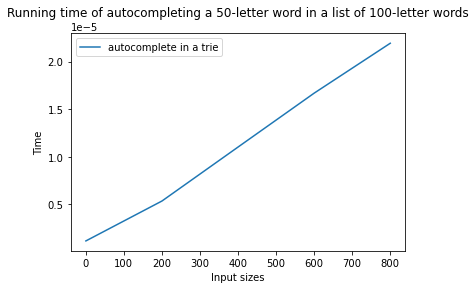

In [18]:
import time
import random
import string


class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):
        
        # children of each node are stored in a dictionary 
        # where key is the char, value is a child node

        self.children = {}
        # initialize all nodes not to be leaves
        self.IsaWord = False
        self.char = char
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        # YOUR CODE HERE
        # get an empty root node
        self.root = Node(None)
        
        # as long as there is word in the word_list
        if word_list:
            
            # insert each word in the tree
            for i in range(len(word_list)):
                self.insert(word_list[i])

    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        
        # initialize the pointer to be the root to start going down
        pointer = self.root
        
        # loop over the whole word
        for char in word:
            # if the next character of the word is in the children keys
            if char in pointer.children:
                # the pointer points to the next child node
                pointer = pointer.children[char]
                
            # otherwise, get a new child node as value with key being the character
            else:
                new_node = Node(char)
                pointer.children[char] = new_node
                pointer = new_node

        # after inserting all characters of a word into the tree
        # the end child marks a complete word
        pointer.IsaWord = True
        
        # get the complete word at the end character
        pointer.wordd = word
    
    def autocomplete(self, key):
        
        # turn the input into lowercase because the word_list only stores lowercase words
        key = key.lower()
        
        # start going down the tree from root
        pointer = self.root
        
        # get a variable showing the current word up to a node
        temp_word = ''
      
        # loop through the key we are suggesting
        for char in key:
            # if the key is not present in the tree, just suggest the key itself
            if not pointer.children.get(char):
                return key
            # with each character found, join with the current word
            temp_word += char
            # move to the next child node
            pointer = pointer.children[char]
            
        # after going through the key, 
        # pointer now finishes the prefix and starts to look for suggested words

        # initialize an empty list holding all suggested words
        suggest_lst = []

        # an inner function to add complete words whose prefix is the key
        def suggestion(pointer, word):
        
            # append the word if it is complete 
            if pointer.IsaWord:
                suggest_lst.append(word)

            # in the children dictionary, loop over next character and its corresponding node as pointer 
            for char,pointer in pointer.children.items():
                suggestion(pointer, word + char)
        

        # call the inner function to get all suggested words
        suggestion(pointer, temp_word)
      
    
        # to get only the most common
        # get an empty dictionary
        most_common = {}
        
        # for every word in the suggestion list
        for word in suggest_lst:
            
            # check how many times in the word list
            for i in self.word_list:
                if i == word and word in most_common:
                    most_common[word] += 1
                elif i == word and word not in most_common:
                    most_common[word] = 1

        # return only the most common word as key in the dictionary
        return max(most_common, key=most_common.get)


#####
letters = string.ascii_lowercase

trie_tree = []
each_trial_trie = []

word_list = []

input_size = [j for j in range(1, 1001, 200)] # 1, 51, 101, 151


for j in input_size: # with different input sizes
    for i in range(50):
   # create a word list whose length is the input size. word length is 100
        word_list.append( ''.join(random.choice(letters) for i in range(100)) for _ in range(j))

        # get a prefix
        target = ''.join(random.choice(letters) for i in range(50))
        
        t = Trie(word_list)

        a = time.time()
        t.autocomplete(target)
        b = time.time()

        each_trial_trie.append(b-a)

    trie_tree.append(sum(each_trial_trie) / 50)



    




import matplotlib.pyplot as plt
%matplotlib inline
y1 = trie_tree

x = input_size
plt.plot(x, y1, label = 'autocomplete in a trie')

plt.xlabel("Input sizes")
plt.ylabel("Time")
plt.title("Running time of autocompleting a 50-letter word in a list of 100-letter words", y = 1.05)
plt.legend()
plt.show()

The graph really supports my reasoning above because the line follows a linear growth as the input sizes get larger and larger. This is true because I predict the time complexity of autocomplete() in trie tree will be O(n)

# HC Appendix

1. ***#dataviz***: Even though I cannot plot the data visualization for the runtime of binary search trees because of some coding problems, I still want to tag this HC because I feel plotting graphs representing insert(), lookup() and autocomplete() methods of trie tree still helps a lot support my analysis. Before doing experiments, I did conduct analytical analysis and graphical representations of the experiments are very helpful in verifying how theoretical knowledge is applied in practice. To elaborate, I justify that the time complexity of insert() and lookup() is theta of l and O(l). From the graph, the line seems to grow linearly because l can be a variable. However, l does not relate to input size and for a 10000-range of input sizes, the runtime only increases from 0 to 0.0005. Likewise, autocomplete() is analytically justified to have O(N) time complexity and the graph does support this. Furthermore,  I also conduct the experiments with each input size 50 times and get the average value so that the data can be more representative and unbiased. 

2. ***#selfawareness***: I applied this HC in this assignment by trying to devise strategies to cope with inhibitions of self-awareness and produce appropriate self-assessment. First, my Professor helped me a lot in how to ace #computationalcritique by summarizing what should constitute a 4 (strengths, limitations, and graphs to contrast an approach with alternatives). I did follow this advice, yet could not complete the idea of randomly generating strings, storing them in two trees, and time how long it takes to do some operations there. However, by the way, I am much clearer about how to closely answer the questions given. Furthermore, two TAs - Ha and Joram - also helped me a lot with coding and getting on the right track of this assignment. Initially, in the first question, I use a list to store children, which complicates indexing and fails to ensure producing corresponding children later. Therefore, Joram hinted at another data structure that can store two data in one element and extract data in constant time. I felt illuminated and used dictionaries in this assignment a lot! Furthermore, when I came to Ha’s OH, I brought my visualization to contrast two trees, yet used tries storing strings and BSTs storing numbers. This is not a reasonable comparison and she suggested that I write the code for BSTs storing strings. She also helped me check the time complexity of different operations supported by tries. I feel more confident after receiving help from other experienced people!

3. ***#designthinking***: With a vague explanation last time, I wanted to improve on this HC in this assignment. The process of refinement does relate to this assignment a lot because I have to redo every question here a few times before getting to what I submitted. In the first assignment, my initial approach was to store a list in node’s children, calculate the index of each character and correspondingly put letters there. However, this not only consumes time but also applies to only a few languages because it suits limited characters. After exchanging with a TA and switching to a dictionary, my code looks more reasonable. I also initially forgot to lowercase the inputted key for lookup until I self-wrote my test cases and realized this. In question two of contrasting two data structures, I made a huge mistake of comparing tries storing strings and BSTs storing numbers. After realizing an unbalanced comparison, I did not want to skip plotting and tried to include graphs about scaling behaviour in some operations supported by trie trees. In question three, I got some problems with preorder tree traversal. I was a bit rigid when really wanting to sort alphabetical order and print data at the same time. However, I got stuck with this approach because my nodes do not take their children alphabetically. I changed to a more straightforward approach that keeps printing out complete words and sorts in the final step. In question 4, my problem was when I wrote my test cases and realized an edge case when we want the number of most common words even larger than elements in the list itself. It helped me a lot in fixing my code. In the last question, having an inner function is a breakthrough for me because it breaks the code into two main parts, taking all complete words sharing the same prefix and getting the most common word. This saves me a lot of time in writing the code for this question. 
